In [1]:
%%html
<style type='text/css'>
.CodeMirror{
    font-size: 15px;
    font-family: Jetbrains Mono;
}

</style>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
main_df = pd.read_csv('working_data/ps4_sales.csv', header = 0, encoding='unicode_escape')
external = pd.read_excel('working_data/vg_sales.xlsx', engine = 'openpyxl')

In [15]:
fifa_games = main_df[main_df['Game'].str.contains('FIFA') == True]

#### Note that the sales (NA-Global) are in Million(s)

In [16]:
fifa_games

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
10,FIFA 16,2015.0,Sports,EA Sports,1.15,5.77,0.07,1.23,8.22
16,FIFA 15,2014.0,Sports,EA Sports,0.83,4.49,0.05,0.94,6.32
43,FIFA Soccer 14,2013.0,Sports,EA Sports,0.62,2.18,0.12,0.51,3.43


In [17]:
top_bought_fifa = fifa_games[fifa_games['Global'].sort_values().max() == fifa_games['Global']]
top_bought_fifa

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.8


In [18]:
main_df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [29]:
us_sales_by_genre = main_df.groupby(['Genre'])['North America'].mean()
us_sales_by_genre

Genre
Action              0.186628
Action-Adventure    0.557500
Adventure           0.054330
Fighting            0.245143
MMO                 0.165000
Misc                0.029593
Music               0.126316
Party               0.045000
Platform            0.119130
Puzzle              0.017500
Racing              0.122083
Role-Playing        0.180081
Shooter             0.567416
Simulation          0.063913
Sports              0.469155
Strategy            0.020357
Visual Novel        0.025000
Name: North America, dtype: float64

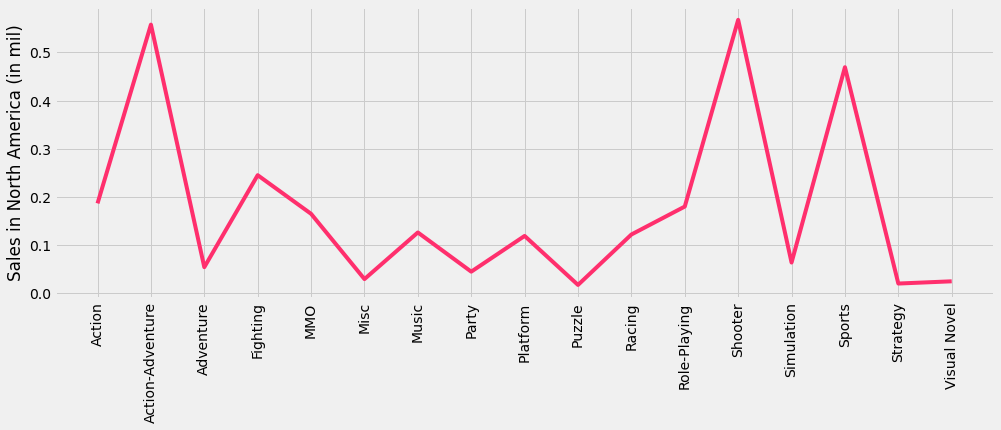

In [56]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15, 5))
plt.plot(us_sales_by_genre.index, us_sales_by_genre, color = '#ff2f6d')
plt.ylabel('Sales in North America (in mil)')
plt.xticks(rotation = '90')
plt.show()

### Most Popular games in the United States & Japan (1980-2019)

<AxesSubplot:xlabel='Genre'>

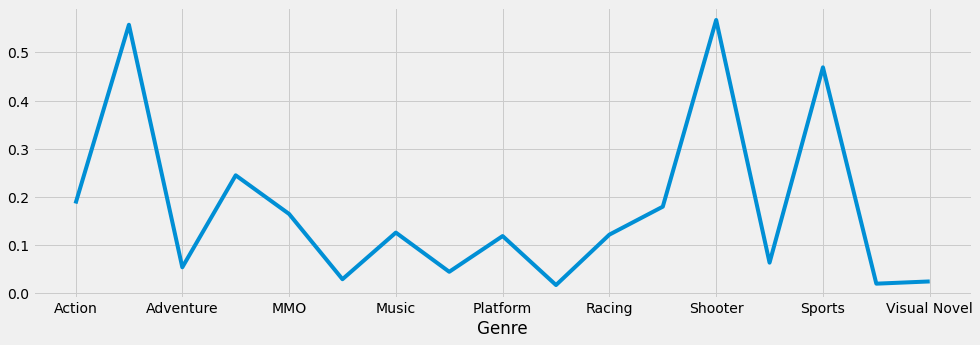

In [37]:
us_sales_by_genre.plot(figsize = (15, 5))

In [38]:
jap_sales_by_genre = main_df.groupby(['Genre'])['Japan'].mean()

<AxesSubplot:xlabel='Genre'>

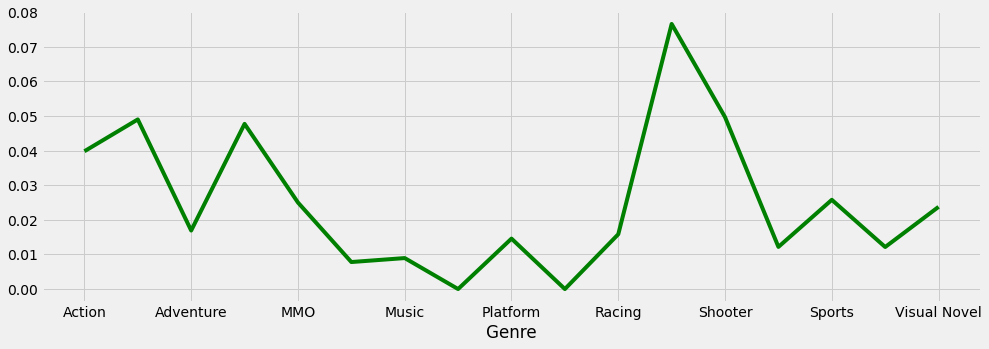

In [57]:
jap_sales_by_genre.plot(figsize = (15, 5), color = 'green')

In [40]:
publishers = main_df.groupby(['Publisher'])['Global'].mean()

In [41]:
top25_pubs = publishers.sort_values(ascending = False).head(25)

### Top 25 Game Publishers based on Global Sales (1980-2019)

<AxesSubplot:xlabel='Publisher'>

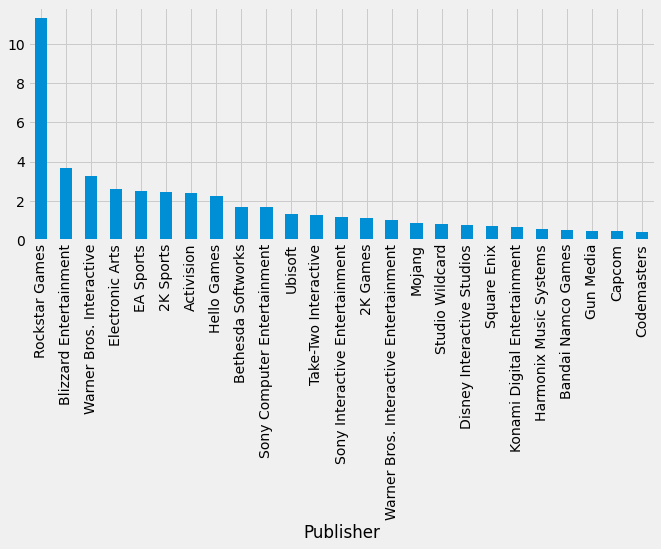

In [42]:
top25_pubs.plot(kind = 'bar' , figsize = (10, 4))

In [43]:
year_wise = main_df.groupby(['Year'])['Global'].mean()

### 2013 & 2018 Were The Years For Gaming . . .

<AxesSubplot:xlabel='Year'>

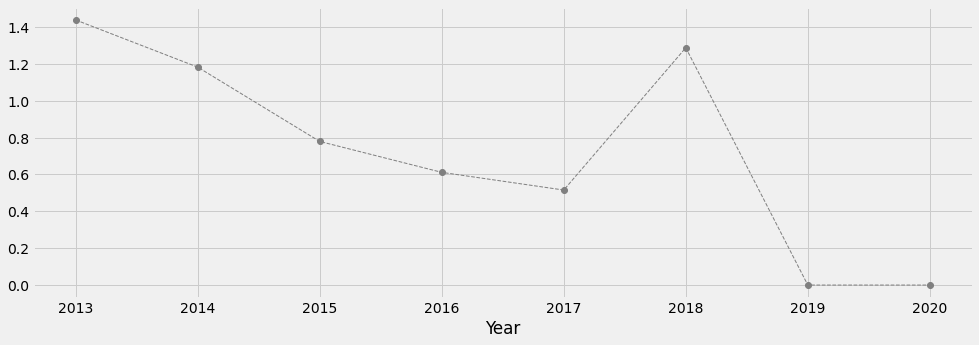

In [67]:
year_wise.plot(figsize = (15, 5), color = 'gray', linestyle = '--', marker = 'o', linewidth = '1')

In [45]:
main_df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


In [46]:
working_data = main_df.dropna()

In [47]:
topgenre_data = working_data.groupby(['Genre'])[['North America', 'Europe', 'Japan', 'Rest of World']].max()

### Top Gaming Genres around the world (1980-2019)

<AxesSubplot:xlabel='Genre'>

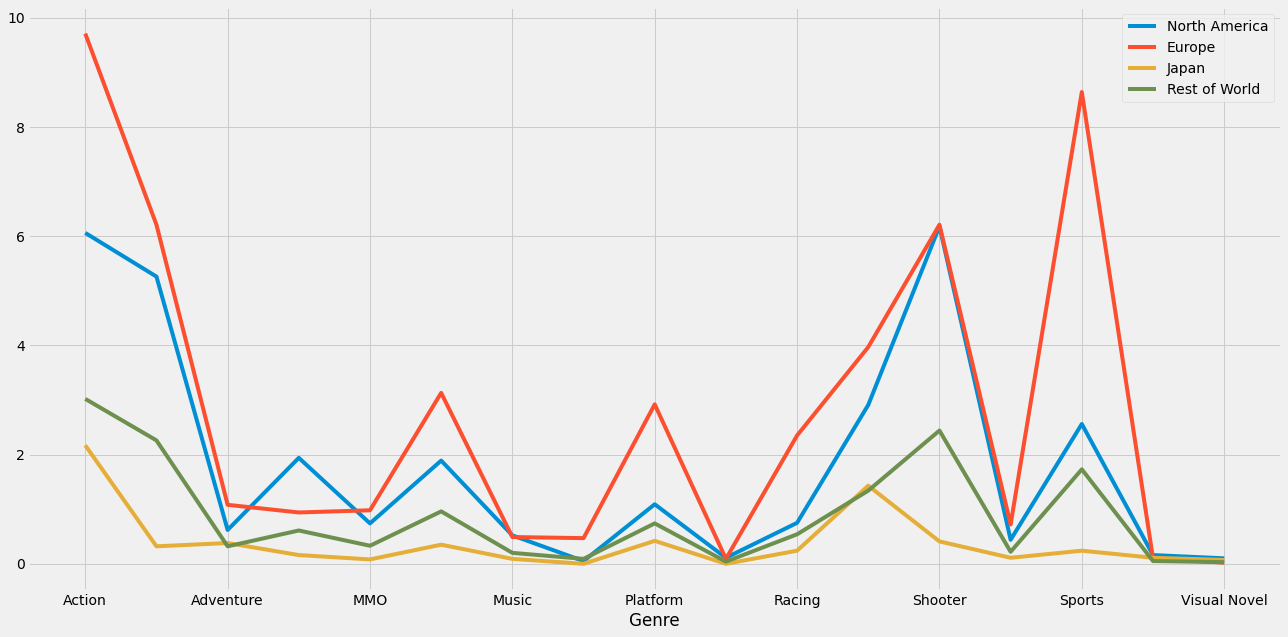

In [49]:
topgenre_data.plot(figsize = (20, 10))

Text(0, 0.5, 'Sales in $ Millions')

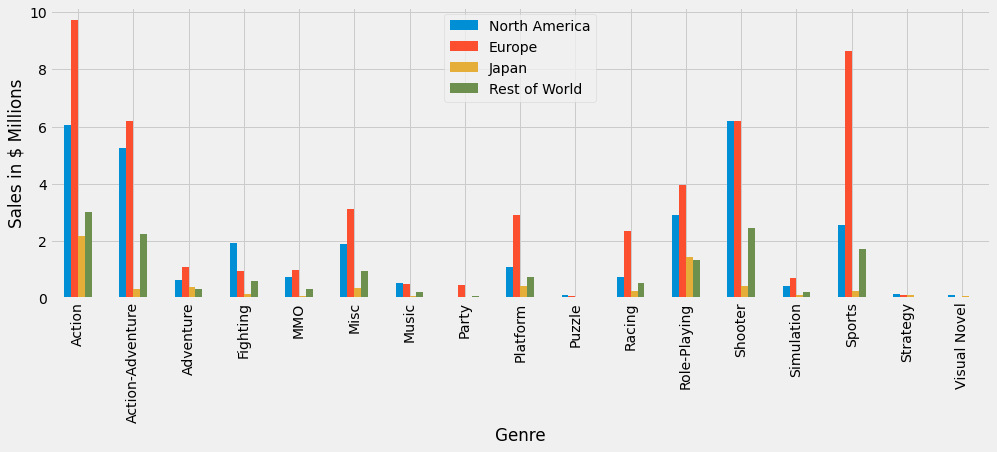

In [69]:
topgenre_data.plot(kind = 'bar' ,figsize = (15, 5))
plt.ylabel('Sales in $ Millions')

In [51]:
rockstar_games = working_data[working_data['Publisher'] == 'Rockstar Games']

In [52]:
rockstar_games

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
197,L.A. Noire,2017.0,Adventure,Rockstar Games,0.18,0.32,0.00,0.10,0.60


In [53]:
ea_games = working_data[(working_data['Publisher'] == 'Electronic Arts') | (working_data['Publisher'] == 'EA Sports')]

### Top EA Games (Play Mordor Theme)

<AxesSubplot:xlabel='Game'>

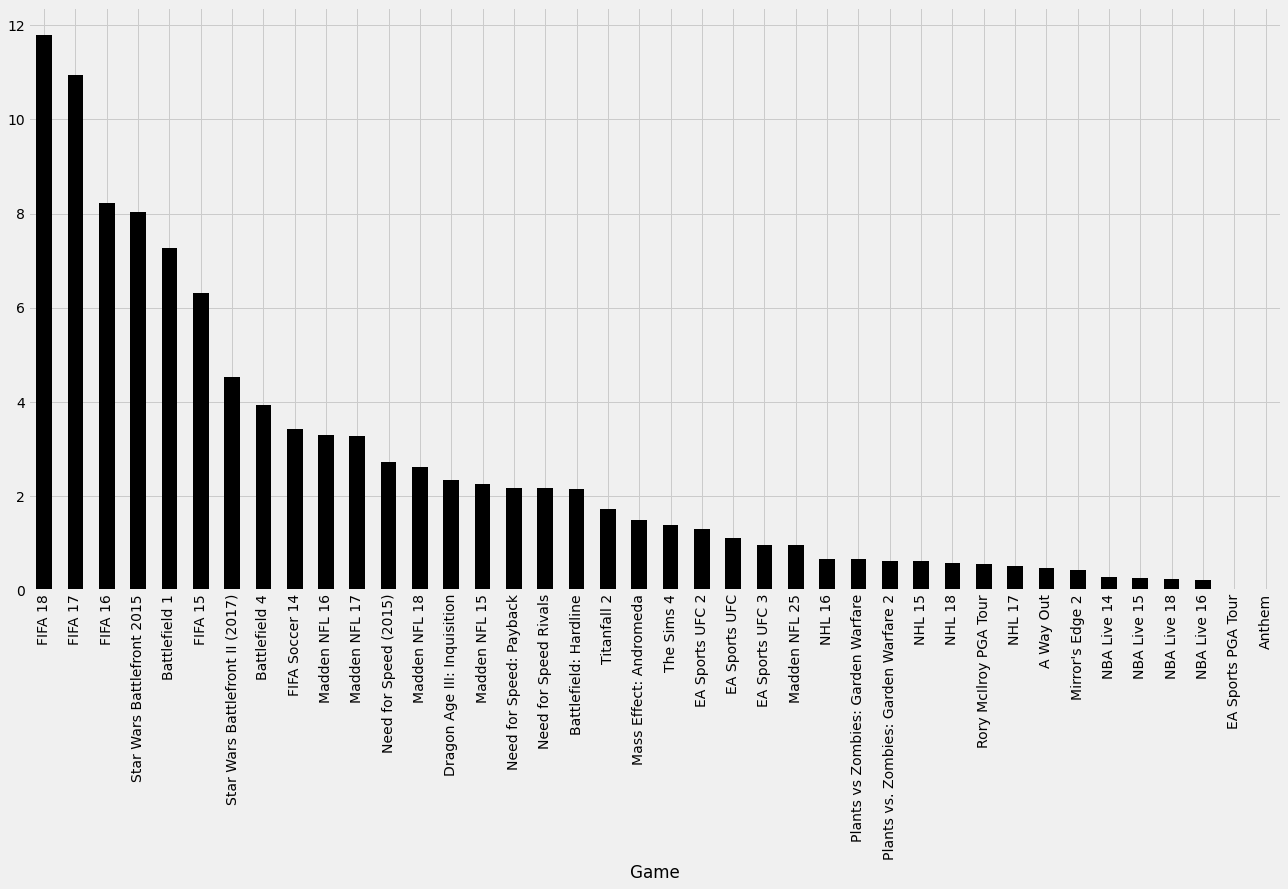

In [58]:
ea_games.set_index('Game')['Global'].plot(kind = 'bar', figsize = (20, 10), color = 'black')

### Average Yearly Sales

<AxesSubplot:xlabel='Year'>

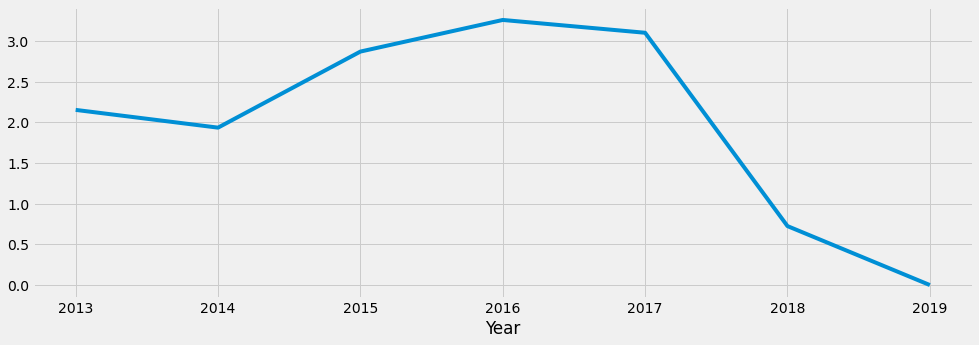

In [55]:
ea_games.groupby(['Year'])['Global'].mean().plot(figsize = (15, 5))